# Data untuk Variabel Random

Kita sudah mempelajari membangun data dari variabel random dengan menggunakan metode menerima atau menolak, dan variabel random lain yang dengan mudah dapat dibangun melalui metode invers. Pada bagian ini kita akan membangun data untuk distribusi normal langsung.

Kita mulai dengan cara yang sederhana. Misalkan $U_1, U_2,\ldots, U_{12}$ masing-masing variabel random berdistribusi uniform di $(0,1)$ dan saling bebas.
Perhatikan bahwa 
$$
E(U_i)=\int_0^1 u du=\left . \frac{1}{2} \right |_0^1 =\frac{1}{2}
$$
dan 
\begin{align}
E((U_i-\frac{1}{2})^2)&=\int_0^1 (u-\frac{1}{2})^2 du\cr
&=\int_0^1 (u^2 -u +\frac{1}{4})^2 du \cr
&= \frac{1}{3}-\frac{1}{2}+\frac{1}{4}=\frac{1}{12}\cr
\end{align}

Selanjutnya variabel random $X=U_1+\ldots +U_{12}-6$ akan mempunyai mean
$$
E(X)=E(U_1)+\ldots +E(U_12)-6=12\times \frac{1}{2} -6=0
$$
Sedangkan variansinya adalah
\begin{align}
E(X^2)&=E((U_1+\ldots +U_{12}-6)^2) \cr
      &=E\left (\left\{(U_1-\frac{1}{2})+ \ldots +(U_12-\frac{1}{2}) \right \}^2\right)\cr
      &=E(\left(U_1-\frac{1}{2}\right)^2)+\ldots +E(\left(U_{12}-\frac{1}{2}\right)^2)\cr
\end{align}
karena variabel random $U_i$ saling bebas.
Dengan demikian 
$$
E(X^2)=\frac{1}{12} +\ldots + \frac{1}{12}=1
$$

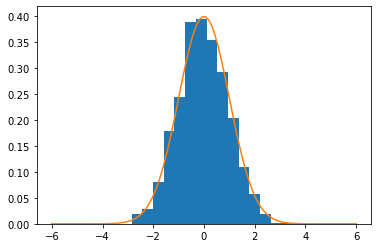

In [1]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import math

x1=np.linspace(-6,6,100)
y1=[math.exp(-i*i/2)/math.sqrt(2*math.pi) for i in x1]


n_sim=1000

x=[]
for i in range(n_sim):
    t=0
    for j in range(12):
        t=t+np.random.uniform(0,1)
    t=t-6
    x.append(t)
plt.hist(x, 15, density=True)
plt.plot(x1,y1)

    
    

## Cara Kedua Membentuk Variabel Random

Misalkan $X,Y$ dua variabel random berdistribusi normal yang saling bebas, maka fungsi distribusi kumulatifnya adalah
$$
P(X\leq x,Y\leq y)=\int_{-\infty}^x \int_{-\infty}^y \left (\frac{1}{\sqrt{2\pi}} \right)^2 \exp(-\frac{1}{2}s^2) \exp(-\frac{1}{2}t^2)\, ds\, dt
$$
Kemudian dengan menggunakan koordinat polar, 
$$
X=\rho \cos \theta \qquad \mbox{dan} \qquad   Y=\rho \sin \theta
$$
perhitungan peluang tersebut dapat dituliskan sebagai
$$
P(X\leq x,Y\leq y)=P(\rho\leq \rho_0, \theta\leq \theta_0 ) =\int_0^{\rho_0} \int_0^{\theta_0} \exp(-\frac{1}{2} \rho^2) \rho d\rho d \theta 
$$
Dengan demikian kita dapat melihat bahwa $\rho$ mememnuhi distribusi Rayleigh dan $\theta$ mempunyai distribusi uniform di $(0,2\pi)$.

Untuk distribusi Rayleigh, kita menghitung distribusi kumulatif nya
$$ 
F(\rho)=\int_0^\infty \rho \exp(-\frac{1}{2} \rho^2 ) d\rho= 1- \exp(-\frac{1}{2} \rho^2 )
$$
Dengan menyelesaikan persamaan $u=1- \exp(-\frac{1}{2} \rho^2 )$ memberikan $\rho =\sqrt{-2 \log(1-u)}$ atau $\rho=\sqrt{-2\log(u)}$.

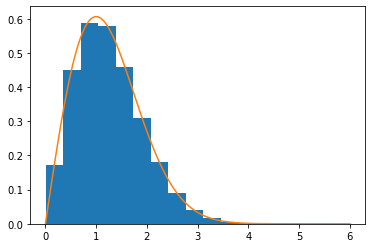

In [2]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import math
n_sim=1000000
rho=[]
for i in range(n_sim):
    t=math.sqrt(-2*math.log(np.random.uniform(0,1)))
    rho.append(t)
    
    
x1=np.linspace(0,6,100)
y1=[i*math.exp(-i*i/2) for i in x1]
plt.hist(rho, 15, density=True)
plt.plot(x1,y1)


Sekarang kita akan membangun data variabel random berdistribusi normal.

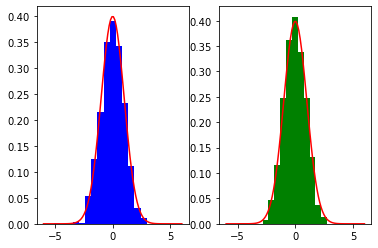

In [6]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import math 
n_sim=1000
x1=[]
x2=[]
for i in range(n_sim):
    t=math.sqrt(-2*math.log(np.random.uniform(0,1)))
    x1.append(t*math.cos(np.random.uniform(0,2*math.pi)))
    x2.append(t*math.cos(np.random.uniform(0,2*math.pi)))
    

x3=np.linspace(-6,6,100)

y1=[math.exp(-i*i/2)/math.sqrt(2*math.pi) for i in x3]
plt.subplot(1,2,1)   
plt.hist(x1, 15, density=True,color='b')
plt.plot(x3,y1,color='r')

plt.subplot(1,2,2)
plt.hist(x2, 15, density=True,color='g')
plt.plot(x3,y1,color='r')
    
    

    


### Perbandingan Ketiga Metode


In [51]:
n_sim=[1000,10000,100000,1000000]
hrata=[]
var=[]
for i in range(len(n_sim)):
    x1=[]
    x2=[]
    x3=[]
    for j in range(n_sim[i]):
    # Metode pertama
        t=0
        for k in range(12):
            t=t+np.random.uniform(0,1)
        t=t-6
        x1.append(t)
        # Metode kedua
        t=math.sqrt(-2*math.log(np.random.uniform(0,1)))
        x2.append(t*math.cos(np.random.uniform(0,2*math.pi)))
        # Metode 3
        mean=0
        sigma=1
        x3.append(np.random.normal(mean,sigma))        
    hrata.append([np.sum(x1)/n_sim[i],np.sum(x2)/n_sim[i],np.sum(x2)/n_sim[i]])
    var1=[i*i for i in x1]
    var2=[i*i for i in x2]
    var3=[i*i for i in x3]
    var.append([np.sum(var1)/n_sim[i],np.sum(var2)/n_sim[i],np.sum(var)/n_sim[i]])    

In [46]:
pd.DataFrame(hrata,columns=['kolom1','kolom2','kolom3'])

,kolom1,kolom2,kolom3
0,0.033575,0.017737,0.017737
1,-0.009182,0.011564,0.011564
2,0.001320,-0.000101,-0.000101
3,-0.001600,0.001301,0.001301


In [49]:
pd.DataFrame(hrata,columns=['Metode 1','Metode 2','Metode 3'],index=[n_sim[0],n_sim[1],n_sim[2],n_sim[3]])

,Metode 1,Metode 2,Metode 3
1000,0.033575,0.017737,0.017737
10000,-0.009182,0.011564,0.011564
100000,0.001320,-0.000101,-0.000101
1000000,-0.001600,0.001301,0.001301


In [50]:
pd.DataFrame(var,columns=['Metode 1','Metode 2','Metode 3'],index=[n_sim[0],n_sim[1],n_sim[2],n_sim[3]])

,Metode 1,Metode 2,Metode 3
1000,1.069872,0.967811,0.000000
10000,0.990553,1.002193,0.000204
100000,1.009950,0.994347,0.000040
1000000,1.000892,0.998500,0.000006


In [23]:
a[0][0]

1

In [37]:
import pandas as pd
x=[1,2,3]
y=[3,4,5]

pd.DataFrame([x,y],columns=['kolom1','kolom2','kolom3'])

,kolom1,kolom2,kolom3
0,1,2,3
1,3,4,5


In [38]:
pd.DataFrame([x,y],columns=['kolom1','kolom2','kolom3'],index=['x','y'])

,kolom1,kolom2,kolom3
x,1,2,3
y,3,4,5
